##### ...continuing from where we stoped at "/Support_group_MD/candida_NLP_up_to_LDA.ipynb

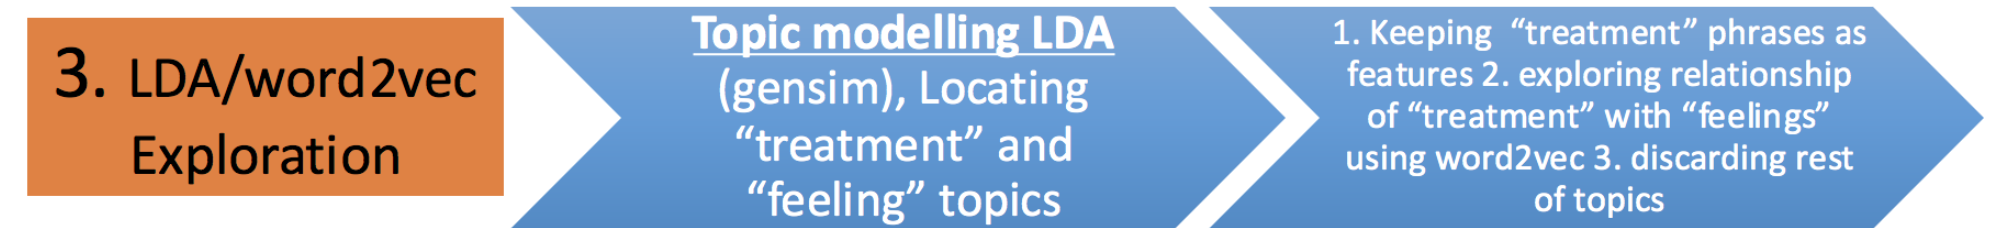

# pyLDAvis_visualizing after LDA 

#### This is after performing LDA on a trigram file and then using pyLDAvis to transform the new LDA object to a pyLDAvis file to be used for visulaization "
##### using Jupyter notebook to visulaize, refer to the following file to follow the process:
/Users/eran/Galvanize_more_repositories/Support_group_MD/pitch_day/sents_LDA.py'

In [4]:
from os.path import join as joinp
import pandas as pd
import numpy as np
import codecs
import itertools as it
import spacy
import boto3
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

nlp = spacy.load('en')

spacy.lang.en.STOP_WORDS.add("-PRON-")
spacy.lang.en.STOP_WORDS.add("'")

Candida_NLP_pyLDAvis_visualizing

In [3]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim
import warnings
import pickle

definning paths:

In [5]:
draft_path='/Users/eran/Galvanize_more_repositories/Support_group_MD/draft'
pilot_path='/Users/eran/Galvanize_more_repositories/Support_group_MD/pilot'  # thr directory with the final files of the project

joinp(pilot_path,'ldavis_25')

'/Users/eran/Galvanize_more_repositories/Support_group_MD/pilot/ldavis_25'

loading file to visualize:

In [16]:
with codecs.open(joinp(pilot_path,'ldavis_25'),'rb') as f:  ## used 'rb' cause of this https://github.com/tkipf/gcn/issues/6
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.display(LDAvis_prepared)

### topics I could define:
1 - diet / foods
4 - symtoms
7 - physiology (mechanism(?))
8 - feeling


### Let's try 15 topics (instead of 25):

In [18]:
with codecs.open(joinp(pilot_path,'ldavis_15'),'rb') as f:  ## used 'rb' cause of this https://github.com/tkipf/gcn/issues/6
    LDAvis_prepared_15 = pickle.load(f)
    
pyLDAvis.display(LDAvis_prepared_15)

### Let's try 10 topics :

In [20]:
with codecs.open(joinp(pilot_path,'ldavis_10'),'rb') as f:  ## used 'rb' cause of this https://github.com/tkipf/gcn/issues/6
    LDAvis_prepared_10 = pickle.load(f)
    
pyLDAvis.display(LDAvis_prepared_10)

### Analyzing our LDA model
The interactive visualization pyLDAvis produces is helpful for both:

Better understanding and interpreting individual topics, and
Better understanding the relationships between the topics.
For (1), you can manually select each topic to view its top most freqeuent and/or "relevant" terms, using different values of the  λλ  parameter. This can help when you're trying to assign a human interpretable name or "meaning" to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In our plot, there is a stark divide along the x-axis, with two topics far to the left and most of the remaining 48 far to the right. Inspecting the two outlier topics provides a plausible explanation: both topics contain many non-English words, while most of the rest of the topics are in English. So, one of the main attributes that distinguish the reviews in the dataset from one another is their language.

This finding isn't entirely a surprise. In addition to English-speaking cities, the Yelp dataset includes reviews of businesses in Montreal and Karlsruhe, Germany, often written in French and German, respectively. Multiple languages isn't a problem for our demo, but for a real NLP application, you might need to ensure that the text you're processing is written in English (or is at least tagged for language) before passing it along to some downstream processing. If that were the case, the divide along the x-axis in the topic plot would immediately alert you to a potential data quality issue.

The y-axis separates two large groups of topics — let's call them "super-topics" — one in the upper-right quadrant and the other in the lower-right quadrant. These super-topics correlate reasonably well with the pattern we'd noticed while naming the topics:

The super-topic in the lower-right tends to be about food. It groups together the burger & fries, breakfast, sushi, barbecue, and greek topics, among others.
The super-topic in the upper-right tends to be about other elements of the restaurant experience. It groups together the ambience & seating, location & time, family, and customer service topics, among others.
So, in addition to the 50 direct topics the model has learned, our analysis suggests a higher-level pattern in the data. Restaurant reviewers in the Yelp dataset talk about two main things in their reviews, in general: (1) the food, and (2) their overall restaurant experience. For this dataset, this is a very intuitive result, and we probably didn't need a sophisticated modeling technique to tell it to us. When working with datasets from other domains, though, such high-level patterns may be much less obvious from the outset — and that's where topic modeling can help.

### Describing text with LDA
Beyond data exploration, one of the key uses for an LDA model is providing a compact, quantitative description of natural language text. Once an LDA model has been trained, it can be used to represent free text as a mixture of the topics the model learned from the original corpus. This mixture can be interpreted as a probability distribution across the topics, so the LDA representation of a paragraph of text might look like 50% Topic A, 20% Topic B, 20% Topic C, and 10% Topic D.

To use an LDA model to generate a vector representation of new text, you'll need to apply any text preprocessing steps you used on the model's training corpus to the new text, too. For our model, the preprocessing steps we used include:

Using spaCy to remove punctuation and lemmatize the text
Applying our first-order phrase model to join word pairs
Applying our second-order phrase model to join longer phrases
Removing stopwords
Creating a bag-of-words representation
Once you've applied these preprocessing steps to the new text, it's ready to pass directly to the model to create an LDA representation. The lda_description(...) function will perform all these steps for us, including printing the resulting topical description of the input text.

In [64]:
## get paths and functions from the preliminery notebook 

def line_review(list_of_posts):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    for post in list_of_posts:
        yield post.replace('\\n', '\n')
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space


### A Pause for a pipeline. 
the following cell aggregates everything from raw text ('A.txt') to lda generated topic classification of every row

accept the original text of a review and 

(1) parse it with spaCy,
    
(2) apply text pre-proccessing steps, 

(3) create a bag-of-words
    representation, 
    
(4) create an LDA representation, and
    
(5) print a sorted list of the top topics in the LDA representation

In [ ]:
#Let's "import all the necessary variables and files needed to do this pipeline that are in the former: .ipynb and sents_LDA.py files'
bigram_model = Phrases.load(joinp(pilot_path, 'bigram_model_all'))
trigram_model = Phrases.load(joinp(pilot_path, 'trigram_model_all'))
lda = LdaMulticore.load(joinp(pilot_path, 'lda_model_10'))
sents_dict = Dictionary.load(joinp(pilot_path,'sent_dict.dict'))
topic_names = {0:'0',1:'1',2: '2',3:'3',4: '4',5: '5',6: '6',7: '7',8: '8',9:'9', 10: '10',11:'11',12:'12',13:'13',14:'14',15:'15',16: '16',17: '17',18: '18',19: '19', 20: '20', 21: '21', 22: '22', 23: '23',24: '24'}


In [ ]:

# The Pipeline
def lda_description(review_text, min_topic_freq=0.05,topic_model_file='lda_model_10'):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_review = [token.lemma_ for token in parsed_review
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_review = bigram_model[unigram_review]
    trigram_review = trigram_model[bigram_review]
    
    # remove any remaining stopwords
    trigram_review = [term for term in trigram_review
                      if not term in spacy.lang.en.STOP_WORDS]
    
    # create a bag-of-words representation
    review_bow = sents_dict.doc2bow(trigram_review)
    
    # create an LDA representation
    lda = LdaMulticore.load(joinp(pilot_path, topic_model_file)) # my addition
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    #review_lda = sorted(review_lda, key=lambda topic_number,freq: freq)
    listt=[]
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print('{:10} {}'.format(topic_names[topic_number],round(freq, 3))) ## for now not putting yet topic names
        #print('{:25} {}'.format(topic_number,round(freq, 3))) 
        x=[topic_names[topic_number],np.round(freq, 3)]
        listt.append(x)
    return(listt)

In [ ]:
#### using raw posts parsed into sentences: '/Users/eran/Galvanize_more_repositories/Support_group_MD/pilot/raw_sentences_all.txt
#### refer to 'sents_LDA.py' for the full process

In [62]:
joinp(pilot_path,'raw_sentences_all.txt')

'/Users/eran/Galvanize_more_repositories/Support_group_MD/pilot/raw_sentences_all.txt'

In [52]:
def get_sample_sent(file_path,sent_number):
    """
    retrieve a particular review index
    from the reviews file and return it
    """
    with codecs.open(file_path, encoding='utf_8') as f:
        for sentence in it.islice(f,sent_number, sent_number+1):
            return sentence.replace('\n', '') 

In [53]:
raw_path = joinp(pilot_path,'raw_sentences_all.txt')  
with codecs.open(raw_path,'r',encoding='utf8') as f:
    raw_sent = f.read()

In [58]:
## let's read a sample post:
sample_sent = get_sample_sent(raw_path,17)
print(sample_sent)

I am not supposed to have coffee, it has been pretty impossible…what should I do??


In [ ]:
lda_description(sample_sent)